In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

house_data = pd.read_csv('kc_house_data.csv')

In [2]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.isnull().sum().sum()

0

This is great we have no NULL values in our data.

In [4]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Since all the houses are in the same county, lat, long, zipcode are not very important so we can remove them. We are also interested in mostly the house itself, so we can also remove sqft_living15 and sqft_lot15.

In [6]:
useful_features = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 
                   'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
house_data_with_useful = house_data[useful_features]

In [7]:
house_data_with_useful.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


Since having a waterfront will greatly increase the view, the waterfront column is included in view so that column is redundant.

In [8]:
house_data_with_useful = house_data_with_useful.drop(columns = 'waterfront')

The condition of the house will be largely determined by when it is build or renovated, so we only need 1 of the columns.

In [9]:
house_data_with_useful = house_data_with_useful.drop(columns = 'yr_renovated')
house_data_with_useful = house_data_with_useful.drop(columns = 'yr_built')

Now we go through and check if all columns contain useful data

In [10]:
house_data_with_useful['date'].unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

We see that the date are within 1 year of each other starting from 2014 May to 2015 April, so the years and days are not as important as month so we isolate for the month.

In [11]:
pd.options.mode.chained_assignment = None
house_data_with_useful['Month'] = house_data_with_useful['date'].astype('str')
house_data_with_useful['Month'] = house_data_with_useful['Month'].str[4:6]
house_data_with_useful['Month'] = house_data_with_useful['Month'].astype('int')
house_data_with_useful.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,Month
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,10
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,12
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,12
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,2


In [12]:
house_data_with_useful = house_data_with_useful.drop(columns = 'date')

In [13]:
house_data_with_useful['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [14]:
house_data_with_useful['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [15]:
house_data_with_useful['sqft_lot'].unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076], dtype=int64)

In [16]:
house_data_with_useful['sqft_living'].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)

In [17]:
house_data_with_useful['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [18]:
house_data_with_useful['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [19]:
house_data_with_useful['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [20]:
house_data_with_useful['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [21]:
house_data_with_useful['sqft_above'].unique()[0:50]

array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420], dtype=int64)

In [22]:
house_data_with_useful['sqft_basement'].unique()[0:50]

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450], dtype=int64)

The data all seem ready to use

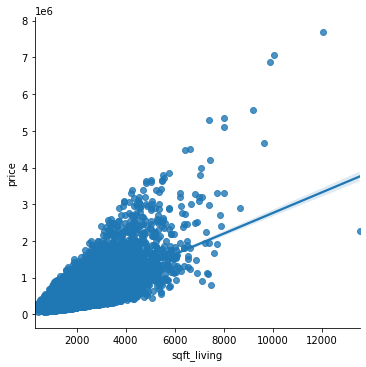

In [23]:
sns.lmplot( x = 'sqft_living', y = 'price', data = house_data_with_useful)

Since most houses are below 7000 sqft_living, a better graph would be if we shrunk the x-axis to up to 7000

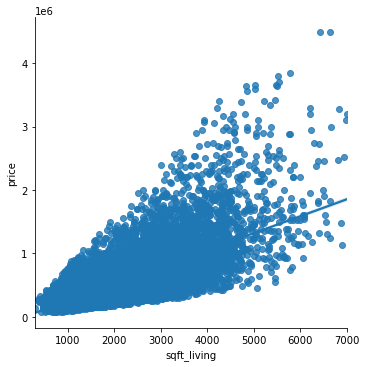

In [24]:
sns.lmplot(data = house_data_with_useful[house_data_with_useful['sqft_living'].between(0, 7000)], x = 'sqft_living', y = 'price')

<AxesSubplot:xlabel='grade', ylabel='price'>

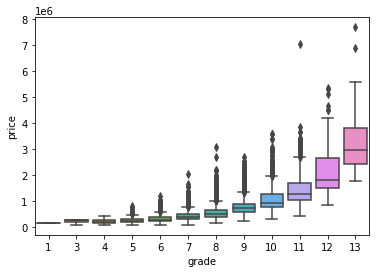

In [25]:
sns.boxplot(x = 'grade', y = 'price', data = house_data_with_useful)

From our boxplot, we can see as the grade of the houses increase, the middle 50% of the price for those houses also increases.

<AxesSubplot:xlabel='floors', ylabel='price'>

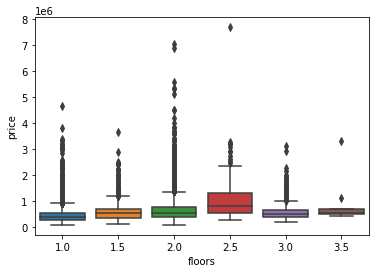

In [26]:
sns.boxplot(x = 'floors', y = 'price', data = house_data_with_useful)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

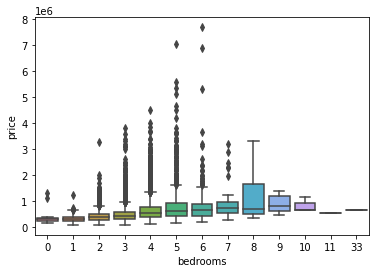

In [27]:
sns.boxplot(x = 'bedrooms', y = 'price', data = house_data_with_useful)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

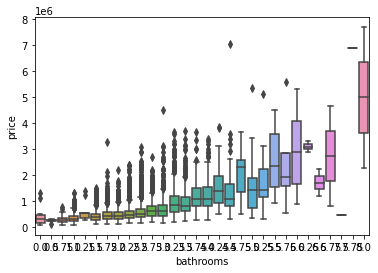

In [28]:
sns.boxplot(x = 'bathrooms', y = 'price', data = house_data_with_useful)

<AxesSubplot:xlabel='view', ylabel='price'>

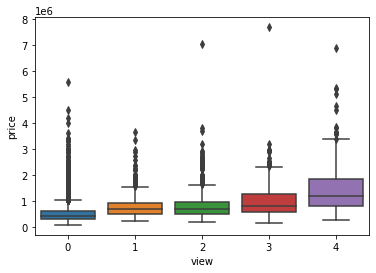

In [29]:
sns.boxplot(x = 'view', y = 'price', data = house_data_with_useful)

<AxesSubplot:xlabel='Month', ylabel='price'>

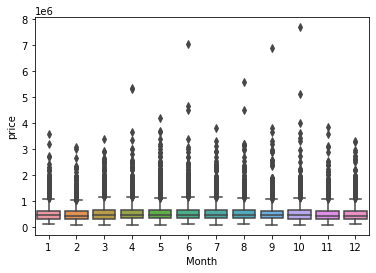

In [30]:
sns.boxplot(x = 'Month', y = 'price', data = house_data_with_useful)

In [31]:
house_data_with_useful.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,Month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.397293,0.036362,0.667434,0.605567,0.323816,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.079532,0.028472,0.356967,0.477600,0.303093,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.187737,-0.124982,0.664983,0.685342,0.283770,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.284611,-0.058753,0.762704,0.876597,0.435043,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.014005
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,1.000000,0.045990,0.251321,0.167649,0.276947,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.251321,-0.144674,1.000000,0.755923,0.168392,0.008376
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.009872


This is a bit tiring on the eye to go through every number, how about we make a grapgh with colours to show which are the most correlated

<AxesSubplot:>

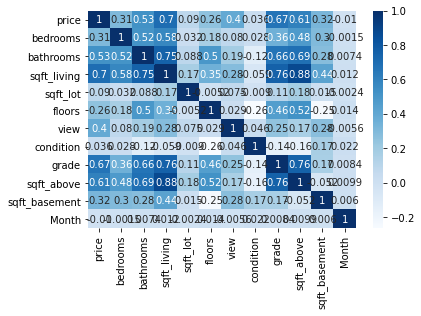

In [41]:
sns.heatmap(house_data_with_useful.corr(), cmap = "Blues", annot = True)

From the correlation map, we can see that sqft living, bathrooms, and grade have the strongest correlation to price like what we predicted in our previous graphs.

In [33]:
from sklearn.model_selection import train_test_split

y = house_data_with_useful['price']
X = house_data_with_useful.drop(columns = 'price')
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [34]:
from sklearn.tree import DecisionTreeRegressor

regression_model = DecisionTreeRegressor(random_state = 1)
regression_model.fit(train_X, train_y)
predicted_y = regression_model.predict(val_X)

In [35]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, predicted_y)
print(val_mae)

184057.74185788305


In [36]:
averageprice = y.mean()

In [37]:
print(val_mae/ averageprice)

0.34079204415757747


On average, we are about 184000 dollars off, but the average price is 540000 dollars so this model is off by about 34% which is pretty big so there is probably a better model for this.

In [38]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor(random_state = 1)
randomforest_model.fit(train_X, train_y)
predicted_y = randomforest_model.predict(val_X)
val_mae = mean_absolute_error(val_y, predicted_y)
print(val_mae)

133726.48122469688


In [39]:
print(val_mae/ averageprice)

0.24760121706672183


As we can see the randomforestregression model is much better than DecisionTreeRegressor since it isonly 24% off from the mean price on average.